# Classifying movie reviews

In this example, we will learn to classify movie reviews into "positive" reviews and "negative" reviews, just based on the text content of the reviews. This is a "binary classification example". 
We will use the ML package called Keras. Please install this package in your working environment! 

## The Dataset

The IMDB dataset: a set of 50,000 reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

The IMDB dataset comes pre-built in Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

The following code will load the dataset (when you run it for the first time, about 80MB of data will be downloaded to your machine):

We load the dataset:

In [9]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install tensorflow

  Using cached tensorflow-2.4.1-cp38-cp38-macosx_10_11_x86_64.whl (173.9 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached wrapt-1.12.1-cp38-cp38-macosx_10_9_x86_64.whl
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached grpcio-1.32.0-cp38-cp38-macosx_10_9_x86_64.whl (3.3 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached Markdown-3.3.3-py3-none-any.whl (96 kB)
  Using cached google_auth_oauthlib-0.4.2-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781

In [11]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 6s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/batukaanozen/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/batukaanozen/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths 

In [16]:

print(test_labels.shape)


(25000,)


In [13]:
print(train_data.shape)

(25000,)


In [14]:
print(train_labels.shape)

(25000,)


In [15]:
print(test_data.shape)

(25000,)


## Prepare the Data

We cannot feed lists of integers into a neural network. We have to turn lists into tensors.

We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape (samples, word_indices), then use as first layer in our network a layer capable of handling such integer tensors (the Embedding layer, which we will cover in detail later).
We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data.
We will go with the latter solution. Let's vectorize our data, which we will do manually for maximum clarity:

In [17]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

**Check one sample:**

In [23]:
x_train.shape[1]

10000

In [18]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building the Network

The input data is simply vectors, and the labels are scalars (1 and 0): this is the easiest setup you will ever encounter. 

**Key questions**: How many layers do we need? How many hidden units for each layer? 
We will build a simple stack of fully-connected (Dense) layers. The network should have the following structure:
- Dense layer with 16 hidden units and ReLU activation function;
- Dense layer with 16 hidden units and ReLU activation function;
- Dense layer output with sigmoid activation function;

**Remember**: For the fully connected layer, it holds: output = relu(dot(W, input) + b), with W weight matrix and b bias.

**Remember**: The sigmoid function will give you a score between 0 and 1, which tells you "how likely the sample is to have "1", that means the review to be "positive".

**Import models and layers from Keras:**

In [19]:
from keras import models
from keras import layers

**Create the network model as described above:**

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

**Configure the model with an  optimizer and  a loss function. Check Keras documentation and try to understand which one suits better for your problem. Use `accuracy` as metrics:**

In [25]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Do the same as in the previous cell but pass an optimizer class instance as the optimizer argument. Check Keras documentation for more insights.**

In [26]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Do the same as in the previous cell, but pass function objects as the loss or metrics arguments.**

In [27]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validating the approach

**Create the Validation set of 10,000 samples and the Training one, consequentily.**

In [28]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Train the model for 20 epochs in mini-batches of 512 samples. Use the Validation set you have just created. Check Keras documentation for more info.**

In [30]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5872 - binary_accuracy: 0.7044 - val_loss: 0.3915 - val_binary_accuracy: 0.8623
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3287 - binary_accuracy: 0.8978 - val_loss: 0.3050 - val_binary_accuracy: 0.8878
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2287 - binary_accuracy: 0.9294 - val_loss: 0.2821 - val_binary_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1749 - binary_accuracy: 0.9451 - val_loss: 0.2730 - val_binary_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1447 - binary_accuracy: 0.9537 - val_loss: 0.2852 - val_binary_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1159 - binary_accuracy: 0.9655 - val_loss: 0.3076 - val_binary_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - los

**Check the `.history` of the result of your fit and print it to see in which format it is and how it is possible to access to the values.**

In [31]:
history_dict = history.history
history_dict.keys()



dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

**Complete the #TO DO to obtain the plot of the training and validation accuracy.**

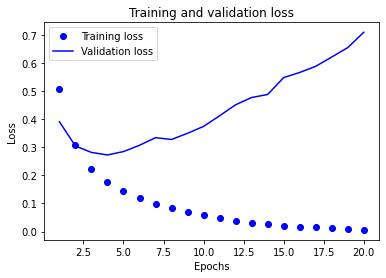

In [37]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy'] #TO DO: take from the history dictionary of the model the training accuracy
val_acc = history.history['val_binary_accuracy'] #TO DO: take from the history dictionary of the model the validation accuracy
loss = history.history['loss'] #TO DO: take from the history dictionary of the model the training loss
val_loss = history.history['val_loss'] #TO DO: take from the history dictionary of the model the validation loss 

epochs = range(1, len(acc) + 1)

# Plot the Loss

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss') #TO DO: use the training loss
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss') #TO DO: use validation loss
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

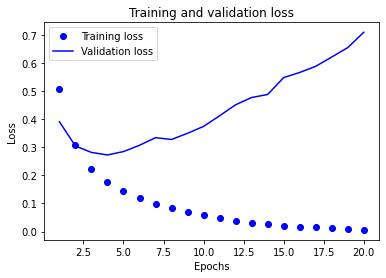

In [41]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy'] #TO DO: take from the history dictionary of the model the training accuracy
val_acc = history.history['val_binary_accuracy'] #TO DO: take from the history dictionary of the model the validation accuracy
loss = history.history['loss'] #TO DO: take from the history dictionary of the model the training loss
val_loss = history.history['val_loss'] #TO DO: take from the history dictionary of the model the validation loss 

epochs = range(1, len(acc) + 1)

# Plot the Loss

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss') #TO DO: use the training loss
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss') #TO DO: use validation loss
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**What can you conclude from these results? Try to analyse and understand them:**

Let's train a new network from scratch for four epochs, then evaluate it on our test data:

** Train a new network from scratch for 4 epochs and evaluate it on the test data. **

In [43]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.5508 - accuracy: 0.7508
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2796 - accuracy: 0.9078
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1986 - accuracy: 0.9307
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3058 - accuracy: 0.8784


## Test the Network

**Make predictions with your model:**

In [44]:
results

[0.30575254559516907, 0.8784400224685669]

In [54]:
#Experiment Model with two layer
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=25, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/25
49/49 [==============================] - 1s 9ms/step - loss: 0.5458 - accuracy: 0.7436
Epoch 2/25
49/49 [==============================] - 0s 8ms/step - loss: 0.2918 - accuracy: 0.9054
Epoch 3/25
49/49 [==============================] - 0s 8ms/step - loss: 0.2220 - accuracy: 0.9270
Epoch 4/25
49/49 [==============================] - 0s 9ms/step - loss: 0.1870 - accuracy: 0.9363
Epoch 5/25
49/49 [==============================] - 0s 8ms/step - loss: 0.1623 - accuracy: 0.9474
Epoch 6/25
49/49 [==============================] - 0s 8ms/step - loss: 0.1439 - accuracy: 0.9548
Epoch 7/25
49/49 [==============================] - 0s 8ms/step - loss: 0.1303 - accuracy: 0.9594
Epoch 8/25
49/49 [==============================] - 0s 8ms/step - loss: 0.1223 - accuracy: 0.9609
Epoch 9/25
49/49 [==============================] - 0s 8ms/step - loss: 0.1095 - accuracy: 0.9672
Epoch 10/25
49/49 [==============================] - 0s 8ms/step - loss: 0.1009 - accuracy: 0.9697
Epoch 11/25
49/49 [

In [55]:
results

[0.6411795020103455, 0.8485599756240845]

In [58]:
#Experiment Model with 3 hidden layer
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=25, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/25
49/49 [==============================] - 1s 16ms/step - loss: 0.5124 - accuracy: 0.7526
Epoch 2/25
49/49 [==============================] - 1s 13ms/step - loss: 0.2388 - accuracy: 0.9110
Epoch 3/25
49/49 [==============================] - 1s 13ms/step - loss: 0.1758 - accuracy: 0.9337
Epoch 4/25
49/49 [==============================] - 1s 13ms/step - loss: 0.1386 - accuracy: 0.9496
Epoch 5/25
49/49 [==============================] - 1s 13ms/step - loss: 0.1063 - accuracy: 0.9615
Epoch 6/25
49/49 [==============================] - 1s 15ms/step - loss: 0.0789 - accuracy: 0.9728
Epoch 7/25
49/49 [==============================] - 1s 14ms/step - loss: 0.0579 - accuracy: 0.9809
Epoch 8/25
49/49 [==============================] - 1s 14ms/step - loss: 0.0395 - accuracy: 0.9890
Epoch 9/25
49/49 [==============================] - 1s 14ms/step - loss: 0.0247 - accuracy: 0.9932
Epoch 10/25
49/49 [==============================] - 1s 13ms/step - loss: 0.0223 - accuracy: 0.9936
Epoch 11/

In [59]:
results

[3.124030113220215, 0.7731199860572815]

In [62]:

#Experiment with loss = binary_crossentropy
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=25, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/25
49/49 [==============================] - 1s 14ms/step - loss: 0.5233 - accuracy: 0.7411
Epoch 2/25
49/49 [==============================] - 1s 14ms/step - loss: 0.2386 - accuracy: 0.9121
Epoch 3/25
49/49 [==============================] - 1s 19ms/step - loss: 0.1701 - accuracy: 0.9391
Epoch 4/25
49/49 [==============================] - 1s 16ms/step - loss: 0.1268 - accuracy: 0.9557
Epoch 5/25
49/49 [==============================] - 1s 15ms/step - loss: 0.1000 - accuracy: 0.9653
Epoch 6/25
49/49 [==============================] - 1s 14ms/step - loss: 0.0773 - accuracy: 0.9739
Epoch 7/25
49/49 [==============================] - 1s 13ms/step - loss: 0.0561 - accuracy: 0.9821
Epoch 8/25
49/49 [==============================] - 1s 13ms/step - loss: 0.0327 - accuracy: 0.9913
Epoch 9/25
49/49 [==============================] - 1s 14ms/step - loss: 0.0304 - accuracy: 0.9915
Epoch 10/25
49/49 [==============================] - 1s 14ms/step - loss: 0.0225 - accuracy: 0.9939
Epoch 11/

In [63]:
results

[1.3679280281066895, 0.856440007686615]

In [65]:

#Experiment with tanh
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=25, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/25
49/49 [==============================] - 1s 13ms/step - loss: 0.5125 - accuracy: 0.7425
Epoch 2/25
49/49 [==============================] - 1s 13ms/step - loss: 0.2184 - accuracy: 0.9152
Epoch 3/25
49/49 [==============================] - 1s 16ms/step - loss: 0.1779 - accuracy: 0.9324
Epoch 4/25
49/49 [==============================] - 1s 17ms/step - loss: 0.1371 - accuracy: 0.9487
Epoch 5/25
49/49 [==============================] - 1s 18ms/step - loss: 0.1250 - accuracy: 0.9543
Epoch 6/25
49/49 [==============================] - 1s 16ms/step - loss: 0.1136 - accuracy: 0.9598
Epoch 7/25
49/49 [==============================] - 1s 15ms/step - loss: 0.0949 - accuracy: 0.9645
Epoch 8/25
49/49 [==============================] - 1s 20ms/step - loss: 0.0832 - accuracy: 0.9719
Epoch 9/25
49/49 [==============================] - 1s 21ms/step - loss: 0.0658 - accuracy: 0.9782
Epoch 10/25
49/49 [==============================] - 1s 19ms/step - loss: 0.0647 - accuracy: 0.9787
Epoch 11/